# ADP 통계 기출 28회 ~ 25회

In [2]:
import pandas as pd
import numpy as np
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

---

# [ 28회 ]

# [ 27회 ]


---

# [ 26회 ]

## < 26회 1번 : 모비율 관련, 최소 표본 크기 > 
철강제품의 불량률을 조사하고자 한다. 이 때, 불량률의 90%, 추정오차한계가 5% 이내가 되기 위하여 적절한 표본의 크기 중 최소값은 얼마인가?

### 접근 방법
- 불량률의 추정값이 90%일 것으로 가정하고, 그 추정값의 추정 오차 한계가 5% 이내가 되도록 표본 크기를 결정하라는 의미
- 불량률'의' 90% $\rightarrow$ '모비율' 관련 최소 표본 크기
    - 즉, 여기서 90%는 신뢰계수
- $p$ 를 모르는 경우 ($p$를 아는 경우는, 아래 처럼 표본 크기를 구할 일이 없음)
<img src="https://i.esdrop.com/d/f/3uJKEwVXJL/KhNQN7PWRW.jpg" width=650/>

In [46]:
from scipy import stats
from sympy import *
import math

# 표준정규분포 선언
# std_normal = stats.norm(0,1)
# z_val = std_normal.ppf(0.95)

confidence_level = 0.9  # 신뢰수준 (90%)
z_value = norm.ppf(1 - (1 - confidence_level) / 2)  # 임계값 계산

print(z_val) # z_val = 1.645  (신뢰계수 90%)

# 불량률
p = 0.5  # 2차식에서 p=0.5를 넣어야 최소가 됨

# n에 관한 방정식(부등식)
n = Symbol('n')

# 여기서 0.05는 그냥 추정오차한계일 뿐, 신뢰계수 95%가 아님
d = z_val * sqrt(p*(1-p)/n) - 0.05 

# 정답
answer_tmp = solve(d)[0]  # 소수점
answer_final = math.trunc(answer_tmp) + 1  # 소수점 버리고 + 1

print('실제 값: ', answer_tmp)
print('정답: ', answer_final)

# 정답
## 실제 값:  270.554345409541
## 정답:  271

1.6448536269514722
실제 값:  270.554345409541
정답:  271


## < 26회 2번 : 이동평균, 시계열 시각화 > 
아래 그래프는 1월부터 9월까지의 은의 가격이다

<img src="https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/26/problem2.png">

1. 은의 가격 및 이동평균값 3이 설정된 시계열 그래프를 그려라
2. 1월 대비 9월의 은의 가격은 몇 % 올랐는가? 소수점 두번째 자리에서 반올림

### 접근 방법
- 이동평균값 3은 rolling(window=3).mean() 이용 !

In [21]:
import pandas as pd 
import numpy as np

df = pd.read_csv("../Data/26_problem4.csv")
df

,1M,2M,3M,4M,5M,6M,7M,8M,9M
0,12.14,42.6,34.4,35.29,30.96,57.12,37.84,42.49,31.38


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1M      1 non-null      float64
 1   2M      1 non-null      float64
 2   3M      1 non-null      float64
 3   4M      1 non-null      float64
 4   5M      1 non-null      float64
 5   6M      1 non-null      float64
 6   7M      1 non-null      float64
 7   8M      1 non-null      float64
 8   9M      1 non-null      float64
dtypes: float64(9)
memory usage: 200.0 bytes


### 2-1) 은의 가격 및 이동평균값 3이 설정된 시계열 그래프를 그려라

In [24]:
MA_data = df.transpose() 
MA_data.columns = ["month_price"]
MA_data

,month_price
1M,12.14
2M,42.60
3M,34.40
4M,35.29
5M,30.96
6M,57.12
7M,37.84
8M,42.49
9M,31.38


In [26]:
import matplotlib.pyplot as plt
import pandas as pd

# 은의 가격 데이터의 이동평균값 3 계산
MA_data["MA3"] = MA_data["month_price"].rolling(window=3).mean()
print(MA_data)

    month_price        MA3
1M        12.14        NaN
2M        42.60        NaN
3M        34.40  29.713333
4M        35.29  37.430000
5M        30.96  33.550000
6M        57.12  41.123333
7M        37.84  41.973333
8M        42.49  45.816667
9M        31.38  37.236667


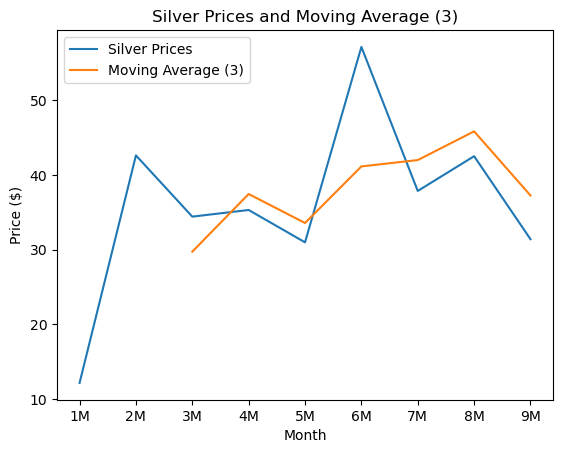

In [28]:
# 시계열 그래프 그리기
fig, ax = plt.subplots()
ax.plot(MA_data["month_price"], label='Silver Prices')
ax.plot(MA_data["MA3"], label='Moving Average (3)')

ax.set_xlabel('Month')
ax.set_ylabel('Price ($)')
ax.set_title('Silver Prices and Moving Average (3)')

ax.legend()
plt.show()

### 2-2) 1월 대비 9월의 은의 가격은 몇 % 올랐는가? 소수점 두번째 자리에서 반올림
- A 대비 B의 증가율 = (B값 - A 값) / A값 * 100

In [29]:
# 1월과 9월의 가격
price_jan = MA_data["month_price"][0]
price_sep = MA_data["month_price"][-1]


# 증감률 계산
# A 대비 B의 증가율 = (B값 - A 값) / A값 * 100
change = (price_sep - price_jan) / price_jan * 100

# 반올림하여 출력
print(round(change, 1))

158.5


## < 26회 3번 : 동질성 검정, 카이제곱 검정 >
아래 그래프는 A,B,C 자치구별 W 의원에 대한 찬성, 반대 지지를 나타낸다. 자치구별 지지율이 같은지에 대해서 검정하라
<img src="https://user-images.githubusercontent.com/119478998/237022541-b0af58eb-e31e-4c89-bdab-92b337014a71.png" width=300>

1. 연구가설과 귀무가설을 설정하라
2. 검정통계량 구하고 결론을 내라

### 접근 방법
- 두 범주형 변수에 대한 검정 -> 카이제곱
- 자치구별 지지율 동일한지 검정, 즉 행과 행의 관련성이므로 동질성에 가깝다고 생각함

### 3-1) 연구가설과 귀무가설을 설정하라.
- 귀무가설 : A, B, C 자치구별 W 의원에 대한 찬성, 반대 지지의 지지율은 모두 같다.
- 대립가설 : A, B, C 자치구별 W 의원에 대한 찬성, 반대 지지의 지지율 중 적어도 하나는 다르다.

In [9]:
df = pd.DataFrame({"vote" :["찬성","반대"],
                    "A" : [176,124],
                    "B" : [193,107],
                    "C" : [159,141]})
df 

,vote,A,B,C
0,찬성,176,193,159
1,반대,124,107,141


In [10]:
df.set_index("vote",inplace=True) # 교차표를 만들어 주기 위해 인덱스 설정
df

,A,B,C
vote,,,
찬성,176,193,159
반대,124,107,141


### 3-2) 검정통계량 구하고 결론을 내라

In [11]:
# 카이제곱 검정을 통한 동질성 검정 수행
from scipy.stats import chi2_contingency

chi2, p, df, expect = chi2_contingency(df) 

# chi2_contingency(df)

print("검정통계량 : ", round(chi2, 5))
print("p-value : ", round(p, 5))

검정통계량 :  7.94538
p-value :  0.01882


#### p-value가 0.01882로 유의수준 0.05보다 작으므로 귀무가설을 기각한다.
#### 따라서 A, B, C 자치구별 W 의원에 대한 찬성, 반대 지지의 지지율 중 적어도 하나는 다르다고 할 수 있다.

## < 26회 4번 : 베이지안 회귀 >
height(키), weight(몸무게), waist(허리둘레) 컬럼을 가진 problem7.csv파일을 가지고 다음을 분석하라
- A시의 20대 남성 411명을 임의로 추출하여 키, 몸무게, 허리둘레를 조사하여 기록한 데이터이다.
- 이 데이터를 이용하여 20대 남성의 키와 허리둘레가 체중에 영향을 미치는지 알아보고자 한다.

4-1. 아래 조건을 참고하여 회귀계수(반올림하여 소수점 두자리)를 구하시오.
- 베이지안 회귀
- 시드넘버 1234로 지정
- 1000번의 burn-in 이후 10,000의 MCMC를 수행
- 회귀계수의 사전분포는 부적절한 균일분포(inproper uniform prior distribution), 오차항의 분산의 사전분포는 역감마 분포로 지정. (이 때, 형상(Shape)모수와 척도(Scale)모수는 각각 0.005로 지정)

4-2. 위에서 만든 모델을 바탕으로 키 180cm, 허리둘레 85cm인 남성의 몸무게를 추정하라.

In [31]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/26/problem7.csv')
df.head()

,height,weight,waistline
0,174.396,72.102,79.3787
1,179.656,81.255,80.6649
2,175.079,76.207,80.3166
3,180.804,81.354,80.8794
4,177.448,78.768,80.3499


### 4-1) 아래 조건을 참고하여 회귀계수(반올림하여 소수점 두자리)를 구하시오.
- 베이지안 회귀
- 시드넘버 1234로 지정
- 1000번의 burn-in 이후 10,000의 MCMC를 수행
- 회귀계수의 사전분포는 부적절한 균일분포(inproper uniform prior distribution), 오차항의 분산의 사전분포는 역감마 분포로 지정. (이 때, 형상(Shape)모수와 척도(Scale)모수는 각각 0.005로 지정)

### 4-2. 위에서 만든 모델을 바탕으로 키 180cm, 허리둘레 85cm인 남성의 몸무게를 추정하라.

---

# [ 25회 ]

- 여러 통계 문제 (각 5점씩 총 20점)

## < 25회 1-1 : 조화평균 >
서울에서 영동까지 100km/h로 가고 영동에서 서울까지 80km/로 돌아왔을 때, 평균 속도는?

## < 25회 1-2 : 기하평균 >
연매출이 3000, 4000, 5000이었다면 연평균 몇배가 증가한 것인가?

## < 25회 1-3 : 조건부 확률 >
남성, 여성의 등산, 수영에 대한 취미 선호도 빈도표(2x2)를 보고, 남성 중에서 등산을 좋아할 확률을 구하시오.

## < 25회 1-4 : 모분산 신뢰구간 추정 >
표본 10개의 분산이 90일 때 신뢰도 95%로 모분산의 신뢰구간을 추정

### 접근 방법
- 모분산의 신뢰구간 추정은 카이제곱과 연관 !
<img src="https://i.esdrop.com/d/f/3uJKEwVXJL/hhZ8I83b6n.jpg" width=300/>

## < 25회 2번 : paired t-test (대응표본 t검정) >
임상 대상 20명에 대해 혈압약 투약 이전과 이후의 차이가 24, 표준편차 9  신뢰구간 95%, 차이가 존재하는지 확인하려한다

1. 귀무가설과 연구가설을 제시하시오.
2. 검정 후 귀무가설 기각 여부 제시

## < 25회 3번 : 크루스컬 윌리스 검정 >
공장 X, Y, Z의 평균 출하 소요시간을 여러 일자에 거쳐 측정한 데이터이다. 각 공장의 중위수의 차이가 존재하는지 확인하려 한다.

1. 귀무가설과 연구가설을 제시하시오
2. 검정 후 귀무가설 기각 여부 제시

In [16]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/25/problem5.csv',encoding='cp949')
df.head()

,출하 소요시간,공장명,공장별 출하 소요시간 순위
0,71,Z,11
1,75,X,14
2,71,X,12
3,53,Z,1
4,50,X,1


### 접근 방법 
- 3개 이상 표본 & '순위'가 들어간 서열 척도 데이터 $\rightarrow$ 크루스컬 윌리스 검정
- 비모수 검정 
- 독립변수는 범주형변수고 종속변수는 연속형변수 $\rightarrow$ One way ANOVA
    - 정규성을 따르면 One way ANOVA로 평균 비교했을 것
    - '중위수'로 비교하므로 정규성을 만족하지 못한다고 판단 $\rightarrow$ 크루스칼로 문제 풀이
    
1. 집단별로 원데이터(출하 소요시간) 분할해주기
    - 순위는 trick
2. 집단별 데이터로 kruskal 검정 실행

###  3-1) 귀무가설과 연구가설을 제시하시오.
- 귀무가설 : 공장 X, Y, Z의 평균 출하 소요시간의 중위수는 모두 같다.
- 대립가설 : 공장 X, Y, Z의 평균 출하 소요시간의 중위수 중 적어도 하나가 다르다. (적어도 하나는 ~ 차이가 있다.)

## 3-2) 검정 후 귀무가설 기각 여부 제시

In [17]:
from scipy.stats import kruskal

# 각 공장의 데이터 추출
factory_X = df[df['공장명'] == 'X']['출하 소요시간']
factory_Y = df[df['공장명'] == 'Y']['출하 소요시간']
factory_Z = df[df['공장명'] == 'Z']['출하 소요시간']

# 크루스칼-윌리스 검정 수행
statistic, p_value = kruskal(factory_X, factory_Y, factory_Z)

# 결과 출력
print("Statistic:", statistic)
print("p-value:", p_value)

Statistic: 0.7217886080379153
p-value: 0.6970526702392181


#### p-value 값이 0.697로 유의수준 0.05보다 크므로, 귀무가설을 기각할 수 없다.
#### 따라서 공장 X, Y, Z의 평균 출하 소요시간의 중위수는 모두 같다고 할 수 있다.